<a href="https://colab.research.google.com/github/sp-au-mu-nl/SpeechComm/blob/main/notebook/chap05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/sp-au-mu-nl/SpeechComm/raw/refs/heads/main/data/chap05.zip
!unzip -o chap05.zip
!rm chap05.zip

--2025-04-23 03:59:29--  https://github.com/sp-au-mu-nl/SpeechComm/raw/refs/heads/main/data/chap05.zip
Resolving github.com (github.com)... 140.82.116.3
Connecting to github.com (github.com)|140.82.116.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sp-au-mu-nl/SpeechComm/refs/heads/main/data/chap05.zip [following]
--2025-04-23 03:59:29--  https://raw.githubusercontent.com/sp-au-mu-nl/SpeechComm/refs/heads/main/data/chap05.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204747 (200K) [application/zip]
Saving to: ‘chap05.zip’

chap05.zip          100%[===================>] 199.95K  --.-KB/s    in 0.03s   

2025-04-23 03:59:29 (6.60 MB/s) - ‘chap05.zip’ saved [204747/204747]

Archive:  chap

プログラム 5.1

In [2]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from scipy import signal
import librosa
import IPython.display

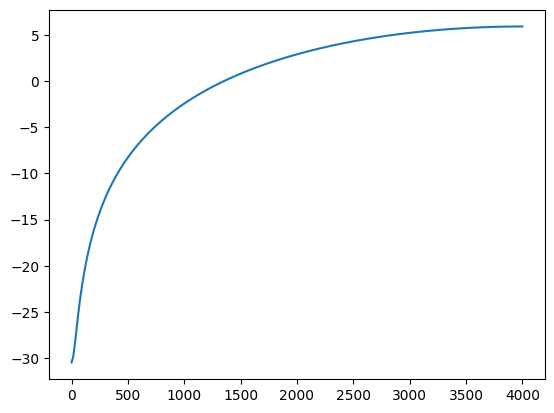

In [3]:
sr = 8000; nFFT = 512
f = np.fft.rfftfreq(nFFT,1/sr)
p = 0.97
S = np.fft.rfft([1,-p],nFFT)
plt.plot(f,20*np.log10(np.abs(S)))

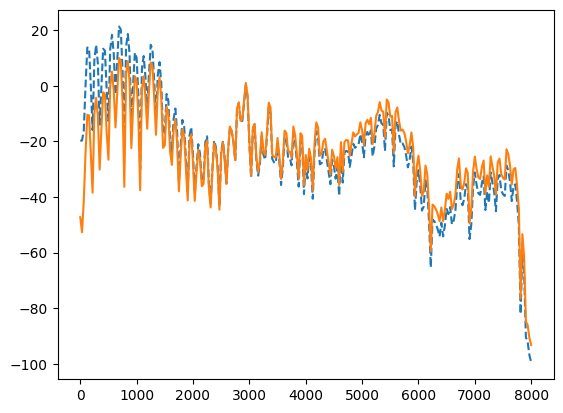

In [4]:
plt.close()
ySa, sr = librosa.load('sa48k.wav',sr=16000)
nFFT = 512
SSa = np.fft.rfft(ySa[7500+np.arange(nFFT)]*np.hanning(nFFT))
ySaEmphasis = signal.lfilter([1,-p],1,ySa)
SSaEmphasis = np.fft.rfft(ySaEmphasis[7500+np.arange(nFFT)]
                          *np.hanning(nFFT))
frequency = np.fft.rfftfreq(nFFT,1/sr)
plt.plot(frequency,20*np.log10(np.abs(SSa)), '--')
plt.plot(frequency,20*np.log10(np.abs(SSaEmphasis)))

プログラム 5.2

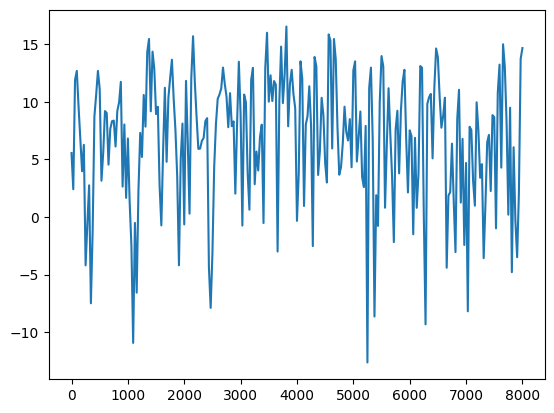

In [5]:
plt.close()
sr = 16000
t = np.linspace(0, 1, sr+1)
r = np.random.standard_normal(t.shape)
r = r/np.max(np.abs(r)*1.01);
nFFT = 512
SR = np.fft.rfft(r[:nFFT]*np.hanning(nFFT))
frequency = np.fft.rfftfreq(nFFT,1/sr)
plt.plot(frequency,20*np.log10(np.abs(SR)))

プログラム 5.3

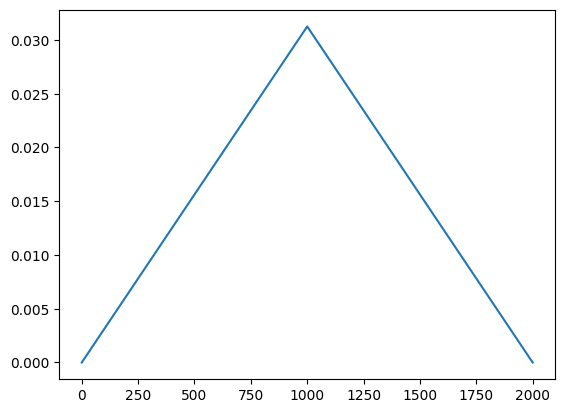

In [6]:
plt.close()
nWindow = int(nFFT / 8)
windowInc = np.linspace(0, 1, int(nWindow/2) + 1)
windowDec = np.linspace(1, 0, int(nWindow/2) + 1)
windowTri = np.hstack((windowInc, windowDec[1:]))
windowTriNormalized = windowTri/np.sum(windowTri)
plt.plot(frequency[:len(windowTriNormalized)], windowTriNormalized)

プログラム 5.4

(6.0, 0.0)

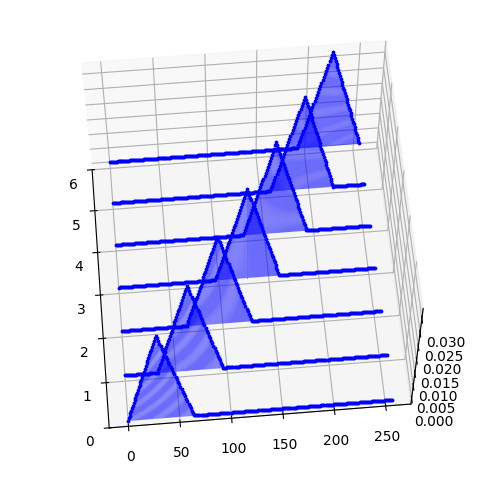

In [7]:
plt.close()

def stem3(z):
    orig_line_width = plt.rcParams['lines.linewidth']
    plt.rcParams['lines.linewidth'] = 0.4
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    if z.ndim == 1:
        Y = 1
        X = z.shape[0]
    else:
        X, Y = z.shape
    for x in range(X):
        for y in range(Y):
            if Y == 1:
                ax.plot([x,x],[y,y],[0,z[x]],'b-')
                ax.scatter(x,y,z[x],s=3,color='b')
            else:
                ax.plot([x,x],[y,y],[0,z[x,y]],'b-')
                ax.scatter(x,y,z[x,y],s=3,color='b')
    plt.rcParams['lines.linewidth'] = orig_line_width
    return fig, ax

center = np.arange(nWindow/2, nFFT/2, nWindow/2).astype(int)
filterBank = np.zeros((len(center),int(nFFT/2) + 1))
for iFilter in np.arange(len(center)):
    iStart = int(center[iFilter] - nWindow/2)
    filterBank[iFilter, iStart:(iStart + nWindow + 1)] = windowTriNormalized

fig, ax = stem3(filterBank)
fig.set_figheight(6)
fig.set_figwidth(6)
ax.set_box_aspect(aspect = (60, 60, 40))
ax.view_init(elev=60, azim=-5)
ax.set_xlim(6,0)
#fig = plt.gcf()
#fig.savefig('fig05_14.eps')

プログラム 5.5

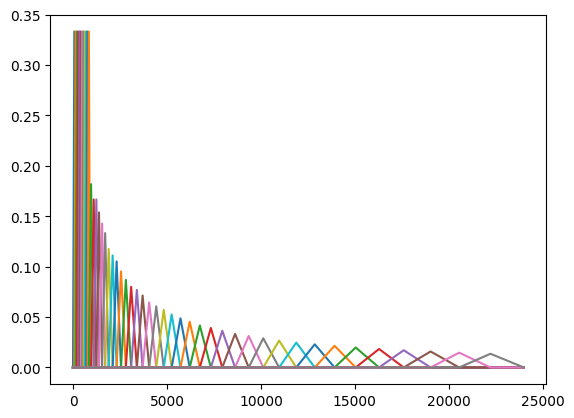

In [8]:
plt.close()
sr = 48000

def hz2mel(freq):
    return 1127*np.log(1 + freq/700)

def mel2hz(mel):
    return (np.exp(mel/1127) - 1)*700

nFFT = 2048
nBank = 48
upper = sr/2
lower = 0
frequency = np.linspace(0, sr/2, int(nFFT/2)+1)

melFilterBank = np.zeros((nBank, int(nFFT/2)+1))
# mel_w_len1 = int(np.floor(1000/(fs/nfft)/5))
nMelWindowLow = int(np.floor(400/3/(sr/nFFT)))
if nMelWindowLow % 2 != 0:
  nMelWindowLow += 1
windowMelIncLow = np.linspace(0, 1, int(nMelWindowLow/2)+1)
windowMelDecLow = np.linspace(1, 0, int(nMelWindowLow/2)+1)
windowMelTriLow = np.hstack((windowMelIncLow, windowMelDecLow[1:]))
windowMelTriLowNormalized = windowMelTriLow/np.sum(windowMelTriLow)
centerLow = np.arange(nMelWindowLow/2, 13 * nMelWindowLow/2,
                      nMelWindowLow/2).astype(int)
# mel_c_idx1 = np.arange(mel_w_len1/2, 1000/(fs/nfft), mel_w_len1/2).astype(int)
for iCenterLow in np.arange(len(centerLow)):
    start = int(centerLow[iCenterLow]-nMelWindowLow/2)
    melFilterBank[iCenterLow, start:(start+nMelWindowLow+1)] = \
        windowMelTriLowNormalized

upperMel = hz2mel(upper)
lowerMel = hz2mel(frequency[centerLow[-1]])
stepMel = (upperMel - lowerMel)/(nBank + 1 - len(centerLow))
center = np.round(mel2hz(np.arange(lowerMel, upperMel+1, stepMel)) /
         (sr/2)*(nFFT/2)).astype(int)
for iCenter in np.arange(len(center)-2):
    t0, t1, t2 = center[iCenter+[0,1,2]];
    iCurrent = iCenterLow+iCenter+1
    melFilterBank[iCurrent, t0:(t1+1)] = np.linspace(0, 1, t1-t0+1)
    melFilterBank[iCurrent, t1:(t2+1)] = np.linspace(1, 0, t2-t1+1)
    melFilterBank[iCurrent, :] = \
        melFilterBank[iCurrent, :] / \
            np.sum(melFilterBank[iCurrent, :])

#fC1 = mel2hz(frequency[centerLow])
#fC2 = mel2hz(np.arange(lowerMel, upperMel+1, stepMel))
#fC = np.hstack((fC1, fC2[1:-1]))

plt.figure()
plt.plot(frequency, melFilterBank.T)
#plt.xlim([0,6000])
#fig = plt.gcf()
#fig.savefig('fig05_17.eps')

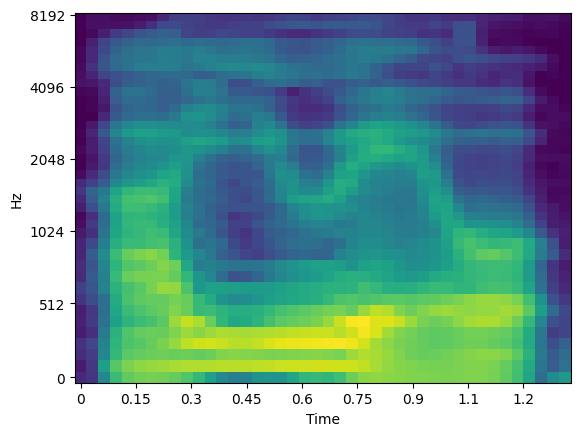

In [9]:
plt.close()
y, sr = librosa.load('aiueo16k.wav',sr=None)
nBank = 40
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=nBank, fmax=8000)
SdB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(SdB, sr=sr, fmax=8000, x_axis='time', y_axis='mel',
                         cmap='viridis')